In [36]:
import lightgbm as lgb, pandas as pd
import dataset, numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sn

from sklearn.metrics import confusion_matrix,classification_report

In [6]:
df=pd.read_csv('bank-additional-full.csv')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
#unique values in each categorical feature
for x in df.columns:
    if df[x].dtype=='object':
        print(x,df[x].nunique())
#         print(df[x].unique().tolist())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [12]:
#one hot encoding
print(df.shape)
for x in df.columns:
    if df[x].dtype=='object':
        
        mdf=pd.get_dummies(df[x]).iloc[:,:-1]
        cols=mdf.columns.tolist()
        mdf.columns=[x+'_'+s for s in cols]
        
        df=pd.concat([df,mdf],axis=1)

        
        print(df.shape,df.shape[1]-df[x].nunique()+1)
        df.drop(x,axis=1,inplace=True)

(41188, 21)
(41188, 32) 21
(41188, 34) 31
(41188, 40) 33
(41188, 41) 39
(41188, 42) 40
(41188, 43) 41
(41188, 43) 42
(41188, 51) 42
(41188, 54) 50
(41188, 55) 53
(41188, 55) 54


In [13]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,1


In [14]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_unknown',
       'housing_no', 'housing_unknown', 'loan_no', 'loan_unknown',
       'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'poutcome_failure', 'poutcome_nonexist

In [15]:
df.shape

(41188, 54)

In [16]:
# can't be used for the model (refer definition of this feature)
df.drop('duration',axis=1, inplace=True)

In [17]:
#separate independent and dependent variables
print(df.shape)
y=df['y_no']
X=df.iloc[:,:-1]
X.shape

(41188, 53)


(41188, 52)

In [18]:
y

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    1
41185    1
41186    0
41187    1
Name: y_no, Length: 41188, dtype: uint8

In [19]:
#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [20]:
# X_valid, X_test, y_valid, y_test=train_test_split(X_test,y_test,test_size=0.3,random_state=0)

In [21]:
#lightgbm 
clf = lgb.LGBMClassifier()

In [22]:
# convert data to lightgbm Dataset object
d_train = lgb.Dataset(X_train, label=y_train)

In [23]:
#defining parameters
SEARCH_PARAMS = {'learning_rate': 0.1,
                'max_depth': 4,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.6}

FIXED_PARAMS={'objective': 'binary',
             'metric': 'auc',
             'is_unbalance':True,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
             'early_stopping_rounds':30}

params = {'metric':FIXED_PARAMS['metric'],
             'objective':FIXED_PARAMS['objective'],
             **SEARCH_PARAMS}

In [24]:
# crossvalidation
cv_results=lgb.cv(params=params,train_set=d_train)

[LightGBM] [Info] Number of positive: 24834, number of negative: 3173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 28007, number of used features: 51
[LightGBM] [Info] Number of positive: 24834, number of negative: 3173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 28007, number of used features: 51
[LightGBM] [Info] Number of positive: 24834, number of negative: 3173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of tes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [25]:
# Crossvalidation results
print('Current parameters:\n', params)
print('\nBest num_boost_round:', len(cv_results['auc-mean']))
print('Best AUC score:', cv_results['auc-mean'][-1])

Current parameters:
 {'metric': 'auc', 'objective': 'binary', 'learning_rate': 0.1, 'max_depth': 4, 'num_leaves': 32, 'feature_fraction': 0.8, 'subsample': 0.2}

Best num_boost_round: 100
Best AUC score: 0.7985909689890669


In [26]:
clf=lgb.train(params={'metric': 'auc', 'objective': 'binary', 'learning_rate': 0.1, 'max_depth': 4,
                'num_leaves': 32, 'feature_fraction': 0.8, 'subsample': 0.6},train_set=d_train)

[LightGBM] [Info] Number of positive: 31043, number of negative: 3966
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 35009, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.886715 -> initscore=2.057615
[LightGBM] [Info] Start training from score 2.057615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [27]:
#make predictions
y_pred=clf.predict(X_test)

C:\Users\Arya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

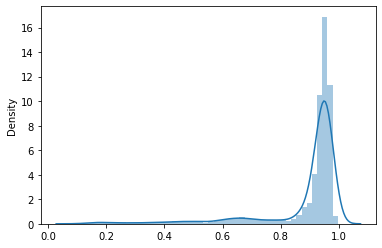

In [28]:
sn.distplot(y_pred)

In [29]:
#event rate of our data
abs(sum(y)-df.shape[0])/df.shape[0]

0.11265417111780131

In [30]:
y_pred

array([0.93268473, 0.87250287, 0.9584637 , ..., 0.9616456 , 0.93537108,
       0.93568718])

In [31]:
y_p=y_pred.copy()

In [32]:
y_train[:5]

7840     1
26948    1
3603     1
36330    0
6278     1
Name: y_no, dtype: uint8

In [33]:
# probability threshold for classifying
y_pred=np.where(y_p<0.8,0,1)

In [34]:
# Confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 394,  280],
       [ 476, 5029]], dtype=int64)

In [37]:
#Final results - classification report

#The class '0' is actually what we are trying to predict.
#Class '0' represents that the person took the term deposit.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51       674
           1       0.95      0.91      0.93      5505

    accuracy                           0.88      6179
   macro avg       0.70      0.75      0.72      6179
weighted avg       0.89      0.88      0.88      6179



# 45% precision and 58% recall - certainly not exceptional.
# For business, this means that if we pick 10000 new individuals for targeting using this model, then 4500 of them will take term deposit in comparison to 1127 people (event rate*10000) which would have come from random selection.

# 58% recall suggests that our model can only cover 58% of all people who would take term deposit. 

# This means our efforts are getting optimized for only 58% of our targets.


In [40]:
#percentage feature importances
featureImp=pd.DataFrame(clf.feature_importance()/clf.feature_importance().sum(),columns=['importance'])


In [41]:
featureImp['feature']=X.columns

In [42]:
# Sorted by feature importance
featureImp=featureImp.sort_values('importance',ascending=False)
featureImp

,importance,feature
7,0.170768,euribor3m
0,0.146905,age
1,0.098434,campaign
6,0.053691,cons.conf.idx
2,0.043997,pdays
5,0.041760,cons.price.idx
4,0.035794,emp.var.rate
36,0.033557,contact_cellular
47,0.032066,day_of_week_mon
8,0.025354,nr.employed


In [44]:
featureImp.to_excel("Feature Importance.xlsx",index=False)

In [45]:
df.shape,X.shape

((41188, 53), (41188, 52))

In [46]:
df.to_csv("Data_after_OneHotEncoding.csv",index=False)